## Example using IRIS dataset

In [1]:
import os
import shutil
import tempfile
import unittest
import pandas as pd
import seaborn as snsx
import matplotlib.pyplot as plt
import numpy as np

from scivae import Optimiser, VAE, Validate
from sciviso import Scatterplot

# Set the location of the mnist data
data_dir = '../tests/data/'
loss = {'loss_type': 'mse', 'distance_metric': 'mmd', 'mmd_weight': 1}
encoding = {'layers':[{'num_nodes': 3, 'activation_fn': 'selu'}]} 
decoding = {'layers': [{'num_nodes': 3, 'activation_fn': 'selu'}]}
latent = {'num_nodes': 2}
optimisers = {'name': 'adam', 'params': {}}

config = {'loss': loss, 'encoding': encoding, 'decoding': decoding, 'latent': latent, 'optimiser': optimisers}

# Path to the data
data = f'{data_dir}iris.csv'

# Build a simple vae to learn the relations in the iris dataset
df = pd.read_csv(data)

# Set up what the columns are
value_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
vae = VAE(df[value_cols].values, df[value_cols].values, df['label'].values, config, 'vae')
vae.encode('default')

# Lets have a look at a scatterplot version & apply the class colours to our plot
encoding = vae.get_encoded_data()
decoding = vae.decoder.predict(encoding)


Using TensorFlow backend.


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
default_input (InputLayer)      (None, 4)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 3)            15          default_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 3)            12          dense_1[0][0]                    
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            8           batch_normalization_1[0][0]      
____________________________________________________________________________________________

## Visualise the latent space

Visualise and colour the latent space.


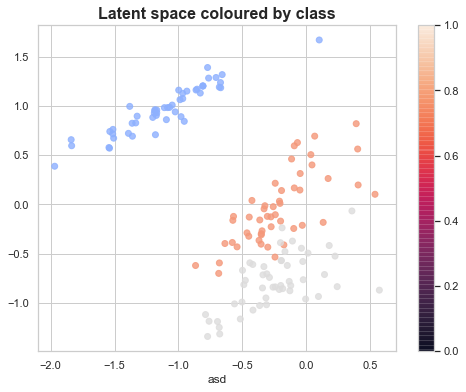

In [3]:
import seaborn as sns
vis_df = pd.DataFrame()
vis_df['latent_0'] = encoding[:, 0]
vis_df['latent_1'] = encoding[:, 1]
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("coolwarm", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1', colour=row_colors2, title='Latent space coloured by class', xlabel='asd')
scatter.plot()

## Print out the accuracy

Here we just get the accuracy of the encoding space when we use it as features for a classifier.

In [4]:

vd = Validate(vae, labels)
print(vd.predict('rf', 'accuracy'))
print(vd.predict('svm', 'balanced_accuracy'))

0.9736842105263158
0.9743589743589745


## Linear version of the same VAE

Here we just show that you can have a linear VAE.

In [5]:
# Use the same parameters as before except we get rid of the encoding and decoding layers
# This means it just goes straight to the encoding layer - hence a one layer VAE ~ linear.
encoding = {'layers':[]} 
decoding = {'layers': []}
config = {'loss': loss, 'encoding': encoding, 'decoding': decoding, 'latent': latent, 'optimiser': optimisers}


# Build a simple vae to learn the relations in the iris dataset
df = pd.read_csv(data)
value_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
lin_vae = VAE(df[value_cols].values, df[value_cols].values, df['label'].values, config, 'vae')
lin_vae.encode('default')

# Lets have a look at a scatterplot version & apply the class colours to our plot
lin_encoding = lin_vae.get_encoded_data()
lin_decoding = lin_vae.decoder.predict(lin_encoding)


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
default_input (InputLayer)      (None, 4)            0                                            
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            10          default_input[0][0]              
__________________________________________________________________________________________________
z_log_sigma (Dense)             (None, 2)            10          default_input[0][0]              
__________________________________________________________________________________________________
z (Lambda)                      (None, 2)            0           z_mean[0][0]                     
                                                                 z_log_sigma[0][0]          

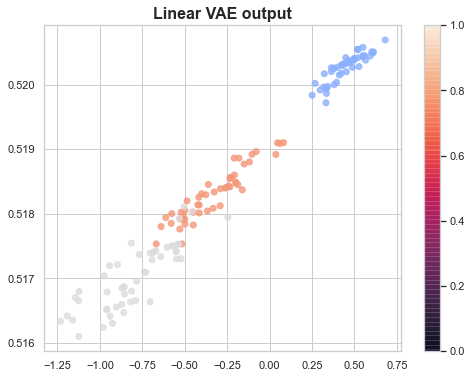

In [6]:
# Plot the linear VAE latent space
vis_df = pd.DataFrame()
vis_df['latent_0'] = lin_encoding[:, 0]
vis_df['latent_1'] = lin_decoding[:, 1]
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("coolwarm", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1', colour=row_colors2, title='Linear VAE output')
scatter.plot()
plt.show()


## Look at the acuracy of linear VAE

Here let's have a look at the how accruate the linear VAE latent features are at predicting the class.

In [7]:

vd = Validate(lin_vae, labels)
print(vd.predict('rf', 'accuracy'))
print(vd.predict('svm', 'balanced_accuracy'))

0.9736842105263158
0.9743589743589745
